# Project: Communicate Data Findings Flights



<a id='intro'></a>
## Introduction 
I have selected custom dataset for my project flights in USA in 2015. I will focus my analysis on flights in state California.

I will be answering following questions:

1. How many wheels_on passengers were travelling in California?
2. What is the rate of wheels_on flights in California?
3. Which origin airports have most wheels_on passengers on Monday in state California?
4. How many WHEELS_ON passengers flights per month were in California?

This project is divided into two major parts. In the first part, I will conduct an exploratory data analysis on a Flight USA 2015 dataset. I will conduct my analysis in Jupyter notebook using Python and its libraries. I will focus my analysis on California state. There I will look research questions above.

In the second part I will use create a slide deck with several choosen findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
# load in the dataset into a pandas dataframe
flights = pd.read_csv('flights.csv')

In [3]:
# load in the dataset into a pandas dataframe
airports = pd.read_csv('airports.csv')

<a id='overview'></a>
## Dataset Overview

Checking out my dataset.

In [4]:
# checking flights.csv
print(flights.shape)
print(flights.dtypes)
flights.head(10)
flights.tail(10)

(274964, 34)
Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          flo

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
274954,299988,66749,2306585,2015,5,27,3,F9,708,N943FR,...,1221.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274955,299989,92595,58054,2015,1,4,7,US,467,N665AW,...,1936.0,15.0,0,0,NaN,5.0,0.0,0.0,10.0,0.0
274956,299990,512658,2285545,2015,5,25,1,WN,3968,N739GB,...,2005.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274957,299991,509115,678783,2015,2,14,6,WN,2722,N8328A,...,2016.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274958,299992,111999,4963454,2015,11,6,5,OO,4556,N8884E,...,1625.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274959,299993,382116,1484404,2015,4,6,1,MQ,2946,N662MQ,...,749.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274960,299994,75737,942657,2015,3,3,2,OO,6250,N776SK,...,1922.0,70.0,0,0,NaN,10.0,0.0,0.0,60.0,0.0
274961,299995,249172,3071702,2015,7,12,7,DL,2794,N662DN,...,931.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274962,299998,488240,5114407,2015,11,16,1,AS,182,N767AS,...,1505.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
274963,299999,105711,440188,2015,1,29,4,B6,761,N746JB,...,2241.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#checking airports.csv
print(airports.shape)
print(airports.dtypes)
airports.head(10)
airports.tail(10)

(322, 7)
IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
312,TYS,McGhee Tyson Airport,Knoxville,TN,USA,35.81249,-83.99286
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN
314,VEL,Valdez Airport,Vernal,UT,USA,40.44090,-109.50992
315,VLD,Valdosta Regional Airport,Valdosta,GA,USA,30.78250,-83.27672
316,VPS,Destin-Fort Walton Beach Airport/Eglin AFB,Valparaiso,FL,USA,30.48325,-86.52540
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023
321,YUM,Yuma International Airport,Yuma,AZ,USA,32.65658,-114.60597


In [6]:
#joining 2 csv datasts together
originair_flights = pd.merge(left=flights, right=airports, how='left', left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')
originair_flights.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,0,363169,5290975,2015,11,28,6,DL,1590,N971AT,...,NaN,NaN,NaN,CAE,Columbia Metropolitan Airport,Columbia,SC,USA,33.93884,-81.11954
1,1,704061,4899614,2015,11,2,1,AA,2516,N3CVAA,...,28.0,0.0,0.0,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
2,2,389056,3769408,2015,8,22,6,AS,93,N317AS,...,NaN,NaN,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,3,132167,4999624,2015,11,9,1,AA,2383,N871AA,...,NaN,NaN,NaN,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
4,4,304371,2572568,2015,6,12,5,US,1978,N833AW,...,NaN,NaN,NaN,CLE,Cleveland Hopkins International Airport,Cleveland,OH,USA,41.41089,-81.84940


In [7]:
print(originair_flights.shape)
print(originair_flights.dtypes)
originair_flights.head(10)
originair_flights.tail(10)

(274964, 41)
Unnamed: 0               int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          flo

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,...,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
274954,299988,66749,2306585,2015,5,27,3,F9,708,N943FR,...,NaN,NaN,NaN,DEN,Denver International Airport,Denver,CO,USA,39.85841,-104.66700
274955,299989,92595,58054,2015,1,4,7,US,467,N665AW,...,0.0,10.0,0.0,EWR,Newark Liberty International Airport,Newark,NJ,USA,40.69250,-74.16866
274956,299990,512658,2285545,2015,5,25,1,WN,3968,N739GB,...,NaN,NaN,NaN,BWI,Baltimore-Washington International Airport,Baltimore,MD,USA,39.17540,-76.66820
274957,299991,509115,678783,2015,2,14,6,WN,2722,N8328A,...,NaN,NaN,NaN,BNA,Nashville International Airport,Nashville,TN,USA,36.12448,-86.67818
274958,299992,111999,4963454,2015,11,6,5,OO,4556,N8884E,...,NaN,NaN,NaN,DTW,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
274959,299993,382116,1484404,2015,4,6,1,MQ,2946,N662MQ,...,NaN,NaN,NaN,LCH,Lake Charles Regional Airport,Lake Charles,LA,USA,30.12610,-93.22340
274960,299994,75737,942657,2015,3,3,2,OO,6250,N776SK,...,0.0,60.0,0.0,ASE,Aspen-Pitkin County Airport,Aspen,CO,USA,39.22316,-106.86885
274961,299995,249172,3071702,2015,7,12,7,DL,2794,N662DN,...,NaN,NaN,NaN,DTW,Detroit Metropolitan Airport,Detroit,MI,USA,42.21206,-83.34884
274962,299998,488240,5114407,2015,11,16,1,AS,182,N767AS,...,NaN,NaN,NaN,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
274963,299999,105711,440188,2015,1,29,4,B6,761,N746JB,...,NaN,NaN,NaN,LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261


In [8]:
#dropping columns I will not need for my analysis
originair_flights.drop(["TAIL_NUMBER","SCHEDULED_DEPARTURE","DEPARTURE_TIME","DISTANCE","AIR_TIME","DEPARTURE_TIME","TAXI_OUT","SCHEDULED_ARRIVAL","TAXI_IN","SECURITY_DELAY","AIRLINE_DELAY","AIR_SYSTEM_DELAY","CANCELLATION_REASON","LATE_AIRCRAFT_DELAY"], axis=1, inplace=True)

In [9]:
originair_flights.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,...,DIVERTED,CANCELLED,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,0,363169,5290975,2015,11,28,6,DL,1590,CAE,...,0,0,NaN,CAE,Columbia Metropolitan Airport,Columbia,SC,USA,33.93884,-81.11954
1,1,704061,4899614,2015,11,2,1,AA,2516,ORD,...,0,0,0.0,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
2,2,389056,3769408,2015,8,22,6,AS,93,SEA,...,0,0,NaN,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,3,132167,4999624,2015,11,9,1,AA,2383,MCO,...,0,0,NaN,MCO,Orlando International Airport,Orlando,FL,USA,28.42889,-81.31603
4,4,304371,2572568,2015,6,12,5,US,1978,CLE,...,0,0,NaN,CLE,Cleveland Hopkins International Airport,Cleveland,OH,USA,41.41089,-81.84940


In [10]:
originair_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274964 entries, 0 to 274963
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           274964 non-null  int64  
 1   Unnamed: 0.1         274964 non-null  int64  
 2   Unnamed: 0.1.1       274964 non-null  int64  
 3   YEAR                 274964 non-null  int64  
 4   MONTH                274964 non-null  int64  
 5   DAY                  274964 non-null  int64  
 6   DAY_OF_WEEK          274964 non-null  int64  
 7   AIRLINE              274964 non-null  object 
 8   FLIGHT_NUMBER        274964 non-null  int64  
 9   ORIGIN_AIRPORT       274964 non-null  object 
 10  DESTINATION_AIRPORT  274964 non-null  object 
 11  DEPARTURE_DELAY      270719 non-null  float64
 12  WHEELS_OFF           270571 non-null  float64
 13  SCHEDULED_TIME       274964 non-null  float64
 14  ELAPSED_TIME         269773 non-null  float64
 15  WHEELS_ON        

Most of the data is filled out, we can see that WEATHER_DELAY has many NaN values.

In [11]:
originair_flights.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,WHEELS_ON,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,WEATHER_DELAY,LATITUDE,LONGITUDE
count,274964.000000,274964.000000,2.749640e+05,274964.0,274964.000000,274964.000000,274964.000000,274964.000000,270719.000000,270571.000000,274964.000000,269773.000000,270377.000000,270377.000000,269773.000000,274964.000000,274964.000000,51863.000000,274703.000000,274703.000000
mean,150050.684421,374262.390051,2.752583e+06,2015.0,6.207376,15.667869,3.925081,2180.364186,9.786749,1358.546795,141.513973,136.955715,1470.581721,1475.626570,4.902333,0.002757,0.016122,3.158591,36.647905,-95.480777
std,86596.045375,216469.350530,1.670198e+06,0.0,3.388097,8.767596,1.992091,1759.360935,37.635842,498.664830,75.157110,74.231113,524.027834,528.119405,39.780979,0.052432,0.125945,22.569128,5.980915,18.124967
min,0.000000,0.000000,4.100000e+01,2015.0,1.000000,1.000000,1.000000,1.000000,-56.000000,1.000000,18.000000,16.000000,1.000000,1.000000,-87.000000,0.000000,0.000000,0.000000,13.483450,-176.646030
25%,75104.750000,186536.500000,1.330938e+06,2015.0,3.000000,8.000000,2.000000,732.000000,-5.000000,937.000000,85.000000,82.000000,1054.000000,1058.000000,-13.000000,0.000000,0.000000,0.000000,32.895950,-111.977770
50%,150178.500000,374015.500000,2.666302e+06,2015.0,6.000000,16.000000,4.000000,1691.000000,-1.000000,1344.000000,122.000000,118.000000,1508.000000,1512.000000,-5.000000,0.000000,0.000000,0.000000,37.361860,-90.258030
75%,224995.250000,561742.500000,4.002737e+06,2015.0,9.000000,23.000000,6.000000,3262.000000,8.000000,1755.000000,173.000000,168.000000,1911.000000,1916.000000,8.000000,0.000000,0.000000,0.000000,40.788390,-81.687860
max,299999.000000,749999.000000,5.819057e+06,2015.0,12.000000,31.000000,7.000000,7438.000000,1461.000000,2400.000000,718.000000,726.000000,2400.000000,2400.000000,1455.000000,1.000000,1.000000,1120.000000,71.285450,-64.798560


In [12]:
#count how many uniques airlines
originair_flights['AIRLINE'].nunique()

14

In [13]:
#count how many uniques ORIGIN_AIRPORT
originair_flights['ORIGIN_AIRPORT'].nunique()

320

In [14]:
#count how many uniques airlines
originair_flights['AIRLINE'].nunique()

14

I decided to focus my analysis on only state - California.

In [15]:
mask = originair_flights["STATE"].isin(["CA"])   
#I made a copy to handle error of chained indexing
airCA = originair_flights[mask].copy()
airCA.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,...,DIVERTED,CANCELLED,WEATHER_DELAY,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
6,6,179324,3704124,2015,8,18,2,OO,5538,SFO,...,0,0,0.0,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
30,31,650240,2619628,2015,6,15,1,WN,260,LAX,...,0,0,NaN,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
35,37,609389,1225475,2015,3,21,6,AA,1462,ONT,...,0,0,NaN,ONT,Ontario International Airport,Ontario,CA,USA,34.05600,-117.60119
38,40,725217,4061683,2015,9,10,4,WN,2590,SFO,...,0,0,NaN,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
49,51,514150,5030381,2015,11,10,2,DL,1792,SAN,...,0,0,NaN,SAN,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966


In [16]:
#check for duplicated values
sum(airCA.duplicated()) #0 means no duplicate values

0

## Exploration of wheels_on passengers in california state in year 2015

I will explore flights in California state. I am also interested how many wheels_on passengers are on these flights.

### What are airlines sizes?

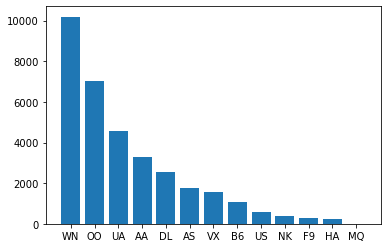

In [17]:
airlines = airCA.AIRLINE.value_counts()
plt.bar(airlines.index, airlines);

Airlines that fly in California state are different sizes.

### How are flights distributed during months?

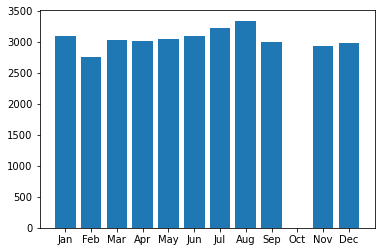

In [18]:
width = 1
bins = np.arange(1, 14, width)
plt.hist(airCA.MONTH, rwidth=.8 , bins=bins)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1.5,max(bins),width), months_names);

Flights are evenly distributed except in month October.

### How are flights distributed during days of week?

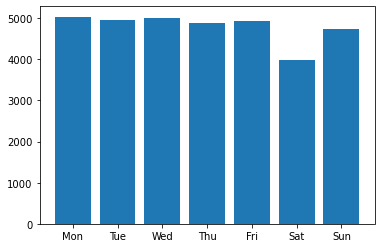

In [19]:
width = 1
bins = np.arange(1, 9, width)
plt.hist(airCA.DAY_OF_WEEK, rwidth=.8 , bins=bins)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

Flights are evenly distributed, there is slow decline on Saturday. 

### How many wheels_on passengers per month were in 2015 in California?

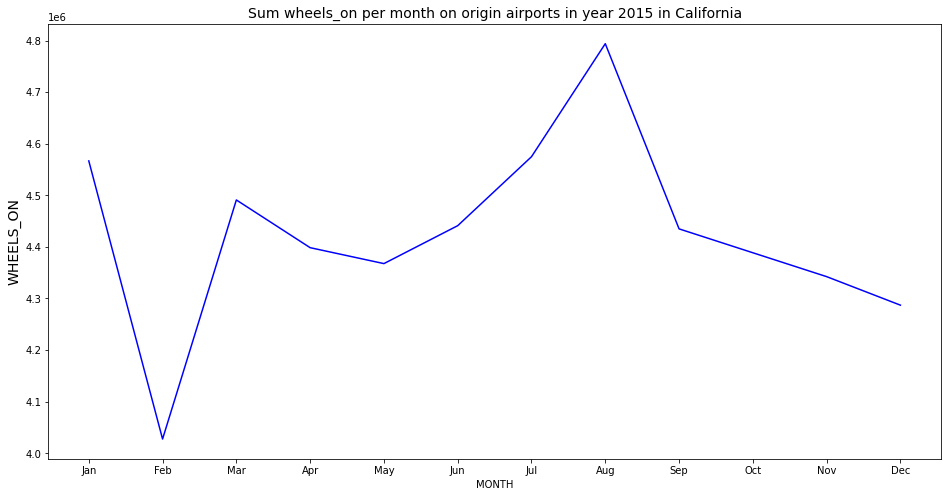

In [21]:
airCA.groupby('MONTH')['WHEELS_ON'].sum().plot(kind = 'line', figsize = (16, 8), color = 'b')
plt.title('Sum wheels_on per month on origin airports in year 2015 in California', fontsize = 14 )
#plt.xlabel('MONTH', fontsize = 14)
plt.ylabel('WHEELS_ON', fontsize = 14)
width = 1
bins = np.arange(1, 14, width)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1,max(bins),width), months_names);

We can see declination of wheels_on passengers in February - there were travelling only a little more than 4 million passengers. Highest number of wheels_on passengers was in August, there were almost 4.8 million in total.

### Which origin airports in California has  more  wheels than 2300 whelchairs on day 7 (Sunday)

In [22]:
#I will inspect following columns
col = ['ORIGIN_AIRPORT','FLIGHT_NUMBER', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'WHEELS_ON', 'STATE']

airCA.query('WHEELS_ON>2300' and 'DAY_OF_WEEK==7')[col].sort_values('WHEELS_ON', ascending = False).head(10)

,ORIGIN_AIRPORT,FLIGHT_NUMBER,YEAR,MONTH,DAY_OF_WEEK,WHEELS_ON,STATE
131945,OAK,2439,2015,7,7,2359.0,CA
130104,SFO,486,2015,8,7,2358.0,CA
135583,LAX,868,2015,2,7,2358.0,CA
214877,SFO,5523,2015,6,7,2358.0,CA
246455,SFO,372,2015,11,7,2357.0,CA
241782,LAX,524,2015,8,7,2357.0,CA
15515,LAX,488,2015,8,7,2357.0,CA
129652,LAX,4642,2015,5,7,2356.0,CA
268175,SFO,1003,2015,1,7,2356.0,CA
203987,SFO,5422,2015,2,7,2355.0,CA


Maximum number of wheels_on per month is 2359.

### Which origin airports have most wheels_on passengers on Monday in state California?

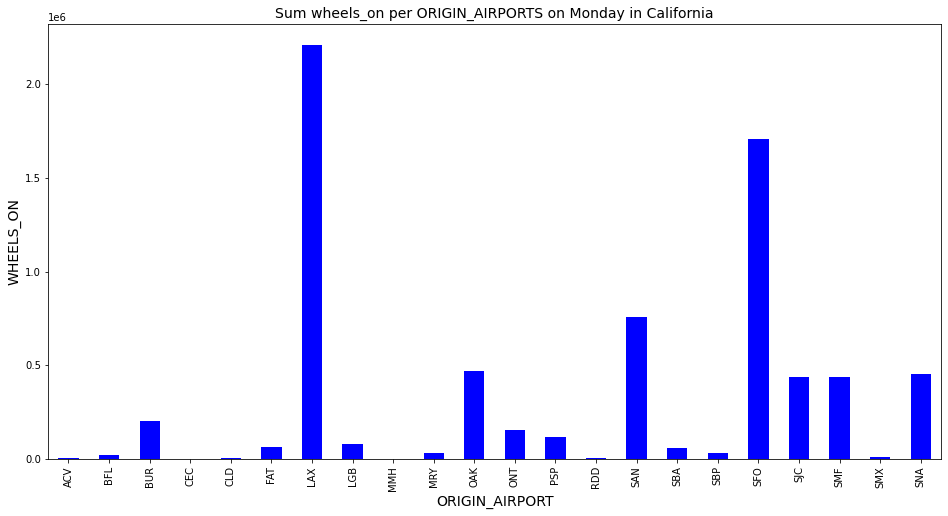

In [23]:
sub_airCA = airCA.query('DAY_OF_WEEK==1')[col].sort_values('WHEELS_ON', ascending = False)
sub_airCA.groupby('ORIGIN_AIRPORT')['WHEELS_ON'].sum().plot(kind = 'bar', figsize = (16, 8), color = 'b')
plt.title('Sum wheels_on per ORIGIN_AIRPORTS on Monday in California', fontsize = 14 )
plt.xlabel('ORIGIN_AIRPORT', fontsize = 14)
plt.ylabel('WHEELS_ON', fontsize = 14);

Origin airports with most wheels_on passenger on all Mondays in 2015 in California were LAX and SFO.

### Which origin airports have most wheels_on passengers on Saturday in state California?

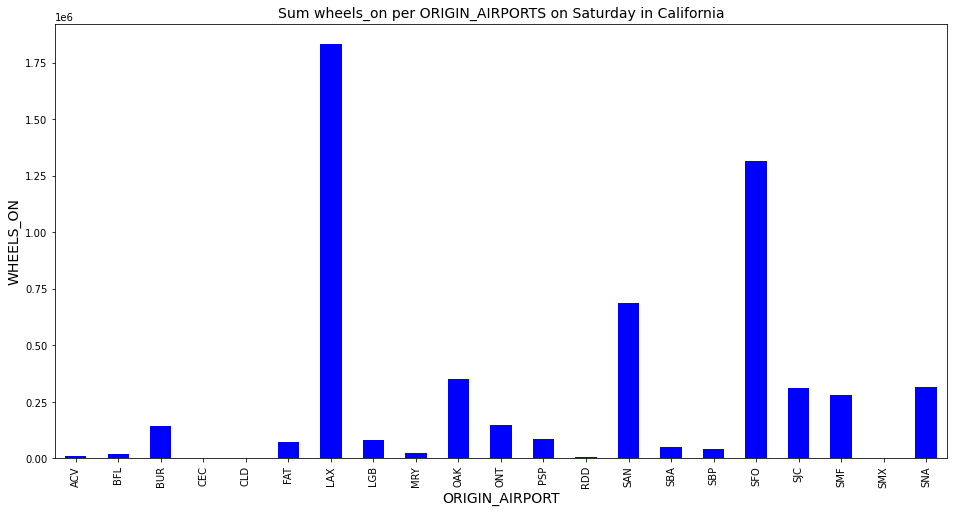

In [24]:
sub_airCA = airCA.query('DAY_OF_WEEK==6')[col].sort_values('WHEELS_ON', ascending = False)
sub_airCA.groupby('ORIGIN_AIRPORT')['WHEELS_ON'].sum().plot(kind = 'bar', figsize = (16, 8), color = 'b')
plt.title('Sum wheels_on per ORIGIN_AIRPORTS on Saturday in California', fontsize = 14 )
plt.xlabel('ORIGIN_AIRPORT', fontsize = 14)
plt.ylabel('WHEELS_ON', fontsize = 14);

Origin airports with most wheels_on passenger on all Saturdays in 2015 in California were LAX and SFO.

### How many wheels_on passengers per month were in California

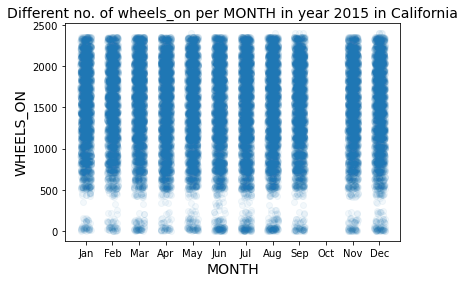

In [25]:
sb.regplot(data = airCA, x = 'MONTH', y = 'WHEELS_ON',fit_reg = False, 
          x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/20})
plt.title('Different no. of wheels_on per MONTH in year 2015 in California', fontsize = 14 )
plt.xlabel('MONTH', fontsize = 14)
plt.ylabel('WHEELS_ON', fontsize = 14);
width = 1
bins = np.arange(1, 14, width)
months_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(1,max(bins),width), months_names);

Every month there are flying from 500 to 2400 whells_on passengers with airlines in California.

### Which origin airports in California that have  most and least wheels_on passengers in 1 year

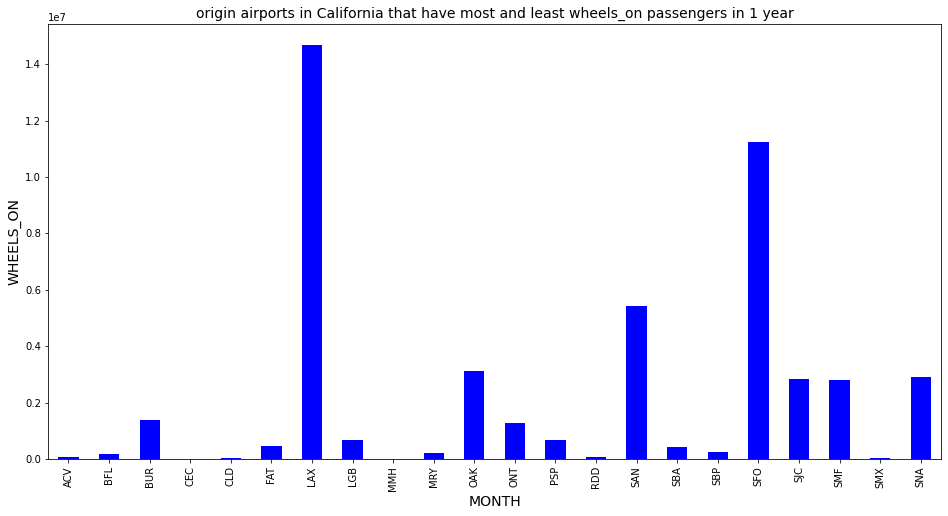

In [26]:
#I will inspect following columns
col = ['ORIGIN_AIRPORT','MONTH', 'DAY_OF_WEEK', 'WHEELS_ON']

airCA.groupby('ORIGIN_AIRPORT')['WHEELS_ON'].sum().plot(kind = 'bar', figsize = (16, 8), color = 'b')
plt.title('origin airports in California that have most and least wheels_on passengers in 1 year', fontsize = 14 )
plt.xlabel('MONTH', fontsize = 14)
plt.ylabel('WHEELS_ON', fontsize = 14);

Origin_airports with most wheels_on passengers is LAX and least wheels_on passengers are ACV, RDD and SMX.

### Researching relationships between month, wheels_on and origin_airport

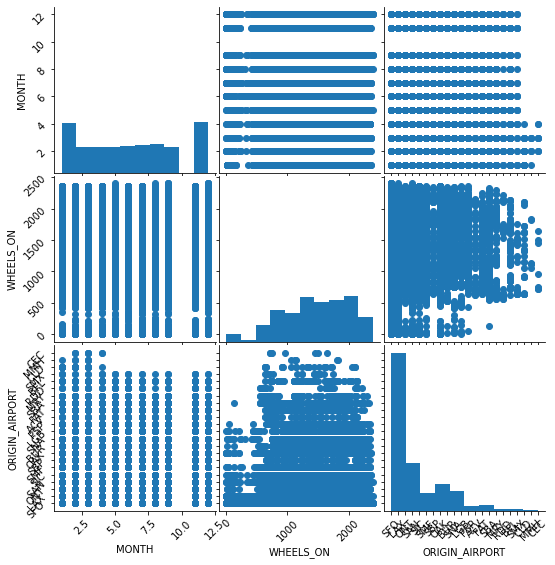

In [43]:
g = sb.PairGrid(data = airCA, vars = ['MONTH', 'WHEELS_ON', 'ORIGIN_AIRPORT'], hue_kws=None)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
# You can specify a rotation for the tick labels in degrees or with keywords.
for ax in g.axes.flatten():
    ax.tick_params(rotation = 45 )
    
g.fig.subplots_adjust(wspace=0.02, hspace=0.02);


In October there is no flights on airports and no wheels_on passengers. There is weak correlation between origin_airport and wheels_on passengers.

### Exploring correlation matrix

In [44]:
data = airCA[['MONTH', 'WHEELS_ON', 'ORIGIN_AIRPORT','AIRLINE', 'DAY_OF_WEEK']]

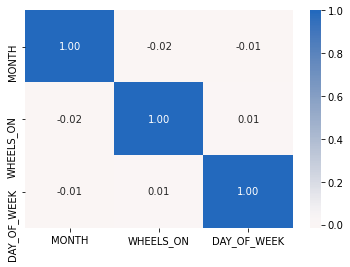

In [45]:
sb.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

There is weak correlation between month and day_of_week.